In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('train.csv')

In [8]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
mean = df['Item_Weight'].mean()
df['Item_Weight'] = df['Item_Weight'].fillna(mean,inplace=True)

In [22]:
mode = df['Outlet_Size'].mode()
df['Outlet_Size'].fillna(mode,inplace=True)

In [27]:
df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [32]:
df1 = pd.get_dummies(df)

In [33]:
x = df1.drop(['Item_Outlet_Sales'],axis=1)
y = df1['Item_Outlet_Sales']

In [35]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,shuffle=True, test_size = 0.3)


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [37]:
x_train = pd.DataFrame(scaler.fit_transform(xtrain))

In [38]:
X_test = pd.DataFrame(scaler.fit_transform(xtest))

In [39]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt

In [41]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, ytrain)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(ytest,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1573.0072061919082
RMSE value for k=  2 is: 1349.3810469626467
RMSE value for k=  3 is: 1274.4868295195558
RMSE value for k=  4 is: 1246.8046360761514
RMSE value for k=  5 is: 1230.5501779273386
RMSE value for k=  6 is: 1218.4209145887164
RMSE value for k=  7 is: 1205.4086772987487
RMSE value for k=  8 is: 1209.5064301005277
RMSE value for k=  9 is: 1212.8928022429732
RMSE value for k=  10 is: 1207.4423144249454
RMSE value for k=  11 is: 1205.2428189379032
RMSE value for k=  12 is: 1205.4724002039957
RMSE value for k=  13 is: 1211.8843781114526
RMSE value for k=  14 is: 1217.5626227382486
RMSE value for k=  15 is: 1226.3436762850329
RMSE value for k=  16 is: 1235.029874114204
RMSE value for k=  17 is: 1240.6591326854048
RMSE value for k=  18 is: 1248.2897022599507
RMSE value for k=  19 is: 1253.8006951105883
RMSE value for k=  20 is: 1258.4632633511962


<Axes: >

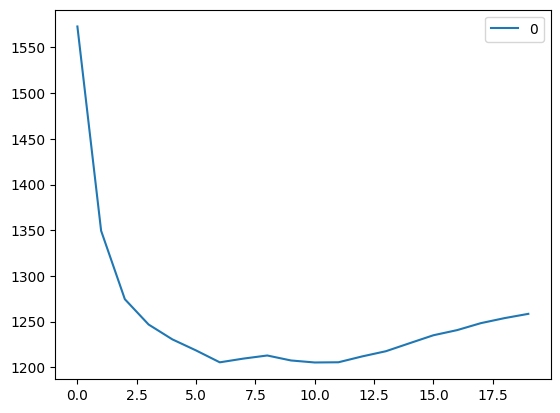

In [42]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [44]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,ytrain)
model.best_params_

{'n_neighbors': 8}